# <font color = 'red' > <center>TEXT CLASSIFICATION PROJECT </center></font >

<b><font color = 'green' >•DOMAIN:</font></b>  Digital content management

<b><font color = 'green' >•CONTEXT: </font></b>Classification  is  probably  the  most  popular  task  that  you  would  deal  with  in  real  life.  Text  in  the  form  of  blogs,  posts,  articles, etc.  is  written  every  second.  It  is  a  challenge  to  predict  the  information  about  the  writer  without  knowing  about  him/her.  We  are  going  to create a classifier that predicts multiple features of the author of a given text. We have designed it as a Multi label classification problem.

<b><font color = 'green' >•DATA  DESCRIPTION:</font></b> Over  600,000  posts  from  more  than  19  thousand  bloggers  The  Blog  Authorship  Corpus  consists  of  the  collected posts of 19,320 bloggers gathered from blogger.com in August 2004. The corpus incorporates a total of 681,288 posts and over 140 million words  -  or  approximately  35  posts  and  7250  words  per  person.  Each  blog  is  presented  as  a  separate file,  the  name  of  which  indicates  a blogger id# and the blogger’s self-provided gender, age, industry, and astrological sign. (All are labelled for gender and age but for many, industry and/or sign is marked as unknown.) All bloggers included in the corpus fall into one of three age groups:<br/>
  • 8240 "10s" blogs (ages 13-17), <br/>
  • 8086 "20s" blogs(ages 23-27) and <br/>
  • 2994 "30s" blogs (ages 33-47)<br/>
For each age group, there is an equal number of male and female bloggers.Each blog in the corpus includes at least 200 occurrences of common English words. All formatting has been stripped with two exceptions. Individual posts within a single blogger are separated by the date of the following post and links within a post are denoted by the label url link. Link to dataset: https://www.kaggle.com/rtatman/blog-authorship-corpus

<b><font color = 'green' >•PROJECT OBJECTIVE: </font></b>The need is to build a NLP classifier which can use input text parameters to determine the label/s of the blog

In [2]:
# importing All important libraries
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import seaborn as sns
#!pip install zipfile
import zipfile

In [3]:
# All required Sklearn libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [4]:
# importing tensorflow libraries


In [5]:
# NLP libraries
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import string


### Preparing the dataset for text classification
 Link to dataset: https://www.kaggle.com/rtatman/blog-authorship-corpus

In [6]:
# dowmloading the dataset from Kaggle
#%%bash
#pip install Kaggle --quiet
#mkdir ~/.kaggle
#cp kaggle.json ~/.kaggle/
#chmod 600 ~/.kaggle/kaggle.json
#!pip install kaggle
#! conda install opendatasets
!kaggle datasets download -d rtatman/blog-authorship-corpus

blog-authorship-corpus.zip: Skipping, found more recently modified local copy (use --force to force download)


In [7]:
#unzipping the downloadd zip
zipfile.ZipFile('blog-authorship-corpus.zip').extractall() 

In [8]:
#loading the dataset
data = pd.read_csv('blogtext.csv')
data.head()

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...


In [9]:
data['text'][0]

'           Info has been found (+/- 100 pages, and 4.5 MB of .pdf files) Now i have to wait untill our team leader has processed it and learns html.         '

In [10]:
data['text'][1]

'           These are the team members:   Drewes van der Laag           urlLink mail  Ruiyu Xie                     urlLink mail  Bryan Aaldering (me)          urlLink mail          '

In [11]:
data['text'][2]

"           In het kader van kernfusie op aarde:  MAAK JE EIGEN WATERSTOFBOM   How to build an H-Bomb From: ascott@tartarus.uwa.edu.au (Andrew Scott) Newsgroups: rec.humor Subject: How To Build An H-Bomb (humorous!) Date: 7 Feb 1994 07:41:14 GMT Organization: The University of Western Australia  Original file dated 12th November 1990. Seemed to be a transcript of a 'Seven Days' article. Poorly formatted and corrupted. I have added the text between 'examine under a microscope' and 'malleable, like gold,' as it was missing. If anyone has the full text, please distribute. I am not responsible for the accuracy of this information. Converted to HTML by Dionisio@InfiNet.com 11/13/98. (Did a little spell-checking and some minor edits too.) Stolen from  urlLink http://my.ohio.voyager.net/~dionisio/fun/m...own-h-bomb.html  and reformatted the HTML. It now validates to XHTML 1.0 Strict. How to Build an H-Bomb Making and owning an H-bomb is the kind of challenge real Americans seek. Who wants to 

In [12]:
data.shape

(681284, 7)

## DATA CLEANING

In [13]:
# we remove columns id and date
data = data.drop(columns = ['id','date'])

In [14]:
data.head()

,gender,age,topic,sign,text
0,male,15,Student,Leo,"Info has been found (+/- 100 pages,..."
1,male,15,Student,Leo,These are the team members: Drewe...
2,male,15,Student,Leo,In het kader van kernfusie op aarde...
3,male,15,Student,Leo,testing!!! testing!!!
4,male,33,InvestmentBanking,Aquarius,Thanks to Yahoo!'s Toolbar I can ...


In [15]:
data.dtypes

gender    object
age        int64
topic     object
sign      object
text      object
dtype: object

In [16]:
data.gender.value_counts()

male      345193
female    336091
Name: gender, dtype: int64

In [17]:
data.gender.unique()

array(['male', 'female'], dtype=object)

In [18]:
data.topic.value_counts()

indUnk                     251015
Student                    153903
Technology                  42055
Arts                        32449
Education                   29633
Communications-Media        20140
Internet                    16006
Non-Profit                  14700
Engineering                 11653
Law                          9040
Publishing                   7753
Science                      7269
Government                   6907
Consulting                   5862
Religion                     5235
Fashion                      4851
Marketing                    4769
Advertising                  4676
BusinessServices             4500
Banking                      4049
Chemicals                    3928
Telecommunications           3891
Accounting                   3832
Military                     3128
Museums-Libraries            3096
Sports-Recreation            3038
HumanResources               3010
RealEstate                   2870
Transportation               2326
Manufacturing 

In [19]:
data.sign.value_counts()

Cancer         65048
Aries          64979
Taurus         62561
Libra          62363
Virgo          60399
Scorpio        57161
Pisces         54053
Leo            53811
Gemini         51985
Sagittarius    50036
Aquarius       49687
Capricorn      49201
Name: sign, dtype: int64

### EDA

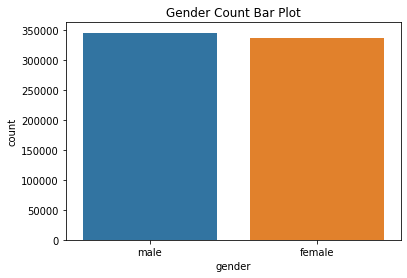

In [20]:
ax = sns.countplot(x='gender',data=data)
plt.title('Gender Count Bar Plot')
#ax.bar_label(ax.container[0])
plt.show()

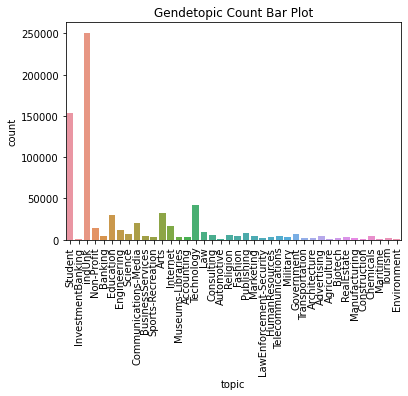

In [21]:
ax = sns.countplot(x='topic',data=data)
plt.title('Gendetopic Count Bar Plot')
#ax.bar_label(ax.container[0])
plt.xticks(rotation=90)
plt.show()

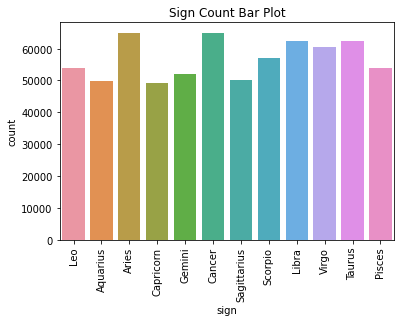

In [22]:
ax = sns.countplot(x='sign',data=data)
plt.title('Sign Count Bar Plot')
#ax.bar_label(ax.container[0])
plt.xticks(rotation=90)
plt.show()

## Steps to clean the data :

**1.Punctuation Removal:**

In this step, all the punctuations from the text are removed. string library of Python contains some pre-defined list of punctuations such as ‘!”#$%&'()*+,-./:;?@[\]^_`{|}~’

In [23]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [24]:
# creating a method to remove Punctuation
def remove_punctuation(text):
    new_text = "".join([word for word in text if word not in list(string.punctuation)])
    return new_text

#lets test it
remove_punctuation(data['text'][0])

'           Info has been found  100 pages and 45 MB of pdf files Now i have to wait untill our team leader has processed it and learns html         '

In [25]:
data['clean_text'] = data['text'].apply(lambda text : remove_punctuation(text))

In [26]:
data['clean_text'].head()

0               Info has been found  100 pages and ...
1               These are the team members   Drewes...
2               In het kader van kernfusie op aarde...
3                           testing  testing          
4                 Thanks to Yahoos Toolbar I can no...
Name: clean_text, dtype: object

**2. Lowering the text:**

It is one of the most common preprocessing steps where the text is converted into the same case preferably lower case. But it is not necessary to do this step every time you are working on an NLP problem as for some problems lower casing can lead to loss of information.

In [27]:
data['clean_text']= data['clean_text'].apply(lambda text: text.lower())

In [28]:
data.clean_text[0]

'           info has been found  100 pages and 45 mb of pdf files now i have to wait untill our team leader has processed it and learns html         '

**3. Remove numbers**

In [29]:
def remove_number(text):
    new_text = "".join(word for word in text if not word.isdigit())
    return new_text

s = 'abcd12345 efg 567'
remove_number(s)

'abcd efg '

In [30]:
data['clean_text']= data['clean_text'].apply(lambda text: remove_number(text))

In [31]:
data.clean_text[0]

'           info has been found   pages and  mb of pdf files now i have to wait untill our team leader has processed it and learns html         '

**4. Remove Links**

In [32]:
def remove_URLS(text):
    return re.sub(r"http\S+","",text)

url_text = "Amazing Save https://stackoverflow.com ok "
remove_URLS(url_text)

'Amazing Save  ok '

In [33]:
data['clean_text'] = data['clean_text'].apply(lambda text: remove_URLS(text))

**5. Remove Html tags**

In [34]:
from bs4 import BeautifulSoup

def remove_HTML(text):
    return BeautifulSoup(text,"lxml").text

In [35]:
data['clean_text'] = data['clean_text'].apply(lambda text: remove_HTML(text))

**Remove mail ids**

In [36]:
t= 'abc user@xxx.com 123 any@www foo @ bar 78@ppp @5555 aa@111'

def remove_mail(text):
    required_output=re.sub(r'[A-Za-z0-9]*@[A-Za-z]*\.?[A-Za-z0-9]*', "", text)
    required_output=" ".join(required_output.split())
    return required_output
    
remove_mail(t)

'abc 123 foo bar'

In [37]:
data['clean_text'] = data['clean_text'].apply(lambda text: remove_mail(text))

In [38]:
data['clean_text'][2]

'in het kader van kernfusie op aarde maak je eigen waterstofbom how to build an hbomb from ascotttartarusuwaeduau andrew scott newsgroups rechumor subject how to build an hbomb humorous date feb gmt organization the university of western australia original file dated th november seemed to be a transcript of a seven days article poorly formatted and corrupted i have added the text between examine under a microscope and malleable like gold as it was missing if anyone has the full text please distribute i am not responsible for the accuracy of this information converted to html by dionisioinfinetcom did a little spellchecking and some minor edits too stolen from urllink and reformatted the html it now validates to xhtml strict how to build an hbomb making and owning an hbomb is the kind of challenge real americans seek who wants to be a passive victim of nuclear war when with a little effort you can be an active participant bomb shelters are for losers who wants to huddle together undergr

**Removing non english words**

In [39]:
words = set(nltk.corpus.words.words())
def remove_non_english_words(text):
    return " ".join(w for w in nltk.wordpunct_tokenize(text) if w.lower() in words or not w.isalpha())

remove_non_english_words(data['clean_text'][2])

'in het van how to build an from subject how to build an humorous date organization the university of western original file th to be a transcript of a seven days article poorly and corrupted i have added the text between examine under a microscope and malleable like gold as it was missing if anyone the full text please distribute i am not responsible for the accuracy of this information converted to by did a little and some minor too stolen from and the it now to strict how to build an making and an is the kind of challenge real seek who to be a passive victim of nuclear war when with a little effort you can be an active participant bomb are for who to huddle together underground eating canned want to push the button themselves making your own is a big step in nuclear assertiveness training its taking charge were sure enjoy the and the heady thrill of nuclear chicken introduction when the down on the progressive magazine for to publish an article on the manufacture of the hydrogen bomb

In [40]:
data['clean_text'] = data['clean_text'].apply(lambda text: remove_non_english_words(text))

In [41]:
data['clean_text'][0]

'been found and of now i have to wait untill our team leader it and'

**6. Tokenization:**

In this step, the text is split into smaller units. We can use either sentence tokenization or word tokenization based on our problem statement

In [42]:
word_tokenize(data.clean_text[0])

['been',
 'found',
 'and',
 'of',
 'now',
 'i',
 'have',
 'to',
 'wait',
 'untill',
 'our',
 'team',
 'leader',
 'it',
 'and']

In [ ]:
data['tokens'] = data['clean_text'].apply(lambda text: word_tokenize(text))

In [ ]:
data['tokens'].head()

**7. Stop words removal:**

Stopwords are the commonly used words and are removed from the text as they do not add any value to the analysis. These words carry less or no meaning.

In [ ]:
stop_words = list(stopwords.words('english'))

In [ ]:
def remove_stopwords(tokens):
    new_tokens = [token for token in tokens if token not in stop_words]
    return new_tokens

remove_stopwords(data['tokens'][0])

In [ ]:
data['Without_stopwords_token'] = data['tokens'].apply(lambda tokens : remove_stopwords(tokens) )

In [ ]:
data['Without_stopwords_token'].head()

## Normalization

**Stemming**

In [ ]:
from nltk.stem import PorterStemmer
porter = PorterStemmer()
words = ['Connects','Connecting','Connections','Connected','Connection','Connectings','Connect']
for word in words:
    print(word,"--->",porter.stem(word))

In [ ]:
 [porter.stem(word) for word in data['Without_stopwords_token'][1]]

In [ ]:
stemmed_tokens =data['Without_stopwords_token'].apply(lambda text : [porter.stem(word) for word in text])

In [ ]:
stemmed_tokens

**lemmatization**

In [ ]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
lemmatizer.lemmatize(data['Without_stopwords_token'][2][1])

In [ ]:
lemma_tokens = data['Without_stopwords_token'].apply(lambda text : [lemmatizer.lemmatize(word) for word in text])

### Target/label merger and transformation


In [ ]:
data['age']= data['age'].astype('object')

In [ ]:
data_orignal = pd.DataFrame()
data_orignal["labels"] = data.apply(lambda col :
                            [col["gender"],col["age"],col["topic"],col["sign"]],axis =1)

In [ ]:
data_orignal['lamme_text'] = [" ".join(token) for token in  lemma_tokens]

In [ ]:
data_orignal.head()

In [ ]:
data_orignal.isnull().sum()

#### Separate features and labels, and split the data into training and testing

In [ ]:
X = data_orignal['lamme_text']
y = data_orignal["labels"]

In [1]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size = 0.30,random_state = 1)

NameError: name 'train_test_split' is not defined

In [ ]:
X_train.shape,X_test.shape

In [ ]:
y_train.shape,y_test.shape

### Vectorize the features
a. Create a Bag of Words using count vectorizer <br/>
i. Use ngram_range=(1, 2)

In [ ]:
# Consider only those rows which occur more than 15% and less than 80 %, also restrict features to 100

vectorizer =CountVectorizer(ngram_range=(1,2))# CountVectorizer(ngram_range = (1,1),min_df = 0.15, max_df = 0.8, max_features = 100)

In [ ]:
# transform the X data to document_term_matrix

X_train_dtm = vectorizer.fit_transform(X_train)
X_test_dtm = vectorizer.transform(X_test)
X_train_dtm

In [ ]:
# check the vocabulary( First 15 features)
vectorizer.get_feature_names_out()[:50]

**Create a dictionary to get the count of every label i.e. the key will be label name and value will be the total count of the label. Check below image for reference**

In [ ]:
label_counts=dict()

for labels in data_orignal.labels.values:
    for label in labels:
        if label in label_counts:
            label_counts[str(label)]+=1
        else:
            label_counts[str(label)]=1

In [ ]:
label_counts

### Transform the labels
As we have noticed before, in this task each example can have multiple tags. To deal with such kind of prediction, we need to transform labels in a binary form and the prediction will be a mask of 0s and 1s. For this purpose, it is convenient to use MultiLabelBinarizer from sklearn a. Convert your train and test labels using MultiLabelBinarizer

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
binarizer=MultiLabelBinarizer(classes=sorted(label_counts.keys()))

In [ ]:
y_train = binarizer.fit_transform(y_train)

In [ ]:
y_test = binarizer.transform(y_test)

### Choose a classifier 
In this task, we suggest using the One-vs-Rest approach, which is implemented in
OneVsRestClassifier class. In this approach k classifiers (= number of tags) are trained. As a
basic classifier, use LogisticRegression . It is one of the simplest methods, but often it
performs good enough in text classification tasks. It might take some time because the
number of classifiers to train is large.


### Fit the classifier, make predictions and get the accuracy 
a. Print the following
i. Accuracy score
ii. F1 score
iii. Average precision score
iv. Average recall score
v. Tip: Make sure you are familiar with all of them. How would you expect the
things to work for the multi-label scenario? Read about micro/macro/weighted
averaging

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
model=LogisticRegression(solver='lbfgs')
model=OneVsRestClassifier(model)
model.fit(X_train_dtm,y_train)

In [ ]:
Ypred=model.predict(X_test_ct)

In [ ]:
Ypred

In [ ]:
y_test

### In Micro-average method, 
you sum up the individual true positives, false positives, and false negatives of the system for different sets and the apply them to get the statistics.

### Macro-average Method
The method is straight forward. Just take the average of the precision and recall of the system on different sets



In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score

def display_metrics_micro(Ytest, Ypred):
    print('Accuracy score: ', accuracy_score(Ytest, Ypred))
    print('F1 score: Micro', f1_score(Ytest, Ypred, average='micro'))
    print('Average precision score: Micro', average_precision_score(Ytest, Ypred, average='micro'))
    print('Average recall score: Micro', recall_score(Ytest, Ypred, average='micro'))
    
    
def display_metrics_macro(Ytest, Ypred):
    print('Accuracy score: ', accuracy_score(Ytest, Ypred))
    print('F1 score: Macro', f1_score(Ytest, Ypred, average='macro'))
    print('Average recall score: MAcro', recall_score(Ytest, Ypred, average='macro'))
    
def display_metrics_weighted(Ytest, Ypred):
    print('Accuracy score: ', accuracy_score(Ytest, Ypred))
    print('F1 score: weighted', f1_score(Ytest, Ypred, average='weighted'))
    print('Average precision score: weighted', average_precision_score(Ytest, Ypred, average='weighted'))
    print('Average recall score: weighted', recall_score(Ytest, Ypred, average='weighted'))
    

In [ ]:

display_metrics_micro(y_test,Ypred)

In [ ]:
display_metrics_macro(Ytest, Ypred)

In [ ]:
display_metrics_weighted(Ytest, Ypred)





### Use a linear classifier (LinearSVC is used in the following) of your choice, wrap it up in OneVsRestClassifier to train it on every label

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

def build_model_train(X_train, y_train, X_valid=None, y_valid=None, C=1.0, model='lr'):
    if model=='lr':
        model = LogisticRegression(C=C, penalty='l1', dual=False, solver='liblinear')
        model = OneVsRestClassifier(model)
        model.fit(X_train, y_train)
    
    elif model=='svm':
        model = LinearSVC(C=C, penalty='l1', dual=False, loss='squared_hinge')
        model = OneVsRestClassifier(model)
        model.fit(X_train, y_train)
    
    elif model=='nbayes':
        model = MultinomialNB(alpha=1.0)
        model = OneVsRestClassifier(model)
        model.fit(X_train, y_train)
        
    elif model=='lda':
        model = LinearDiscriminantAnalysis(solver='svd')
        model = OneVsRestClassifier(model)
        model.fit(X_train, y_train)

    return model

In [ ]:
models = ['lr','svm','nbayes']
for model in models:
    model = build_model_train(X_train_ct,y_train,model=model)
    model.fit(X_train_ct,y_train)
    Ypred=model.predict(X_test_ct)
    print("\n")
    print(f"**displaying  metrics for the mode {model}\n")
    display_metrics_micro(y_test,Ypred)
    print("\n")
    print("\n")
    display_metrics_macro(y_test,Ypred)
    print("\n")
    print("\n")
    display_metrics_weighted(y_test,Ypred)
    print("\n")
    print("\n")
    

### NOTE : I Didn't perform NN because of memory constaint , Understand it and dont reduce mark for that  and didnt not perform any tuning Here as it is crashing my os 

__Key Notes__:

1. we have solved  Multilabel classification problem that predicts multiple features of the author of a given text
2. Loading the data and  required basic EDA and data inspection has been done
2. The text has been pre processed like cleansing it(removing the unnecessary chars, removing the spaces, converting the case to lower) and also removing the stop words, vectorizing the features
3. Preparing the date, splitting them to train and test
4. using multilable binarizers, also various classifier models are trained and the predictions are made and also the accuracy, f1 score, Avg precision and recall scores are calculated.
